# Botnoi Mini Project : Kaidee Dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score

- import ข้อมูลจาก train.csv และ test.csv

In [62]:
def load_data():
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    return train_df, test_df

In [63]:
train_df, test_df = load_data()

In [64]:
train_df.head()

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,569000,"""เลขไมล์5,700กิโลแท้ 1.3 SP โฉมปัจจุบัน รถ2เดื...",354186401,กรุงเทพมหานคร,1584521455,5700,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง
1,1150000,ขาย Chevrolet c10 ปี 1965 รถแท้ ขับขวา พร้อมโอ...,356227846,กรุงเทพมหานคร,1591021387,1234,Chevrolet,รุ่นอื่นๆ,1965,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ
2,799000,📢มาแว้วว... ลค.ที่ชอบรถสีขาว​ ใสๆเลย\nใครเร็วก...,356055202,นนทบุรี,1590502642,100000,Mitsubishi,Pajero Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
3,429000,รหัส 130/v36\n2010 toyota CAMRY 2.4 hybrid nav...,356169430,กรุงเทพมหานคร,1590844871,184921,Toyota,Camry,2010,ไฮบริด,เกียร์อัตโนมัติ,ดำ,รถเก๋ง
4,268000,เครื่อง 1.2 E โฉมไฟใหม่ พ.พาวเวอร์ ก.ไฟฟ้า ซทล...,354415016,กรุงเทพมหานคร,1585546785,103000,Nissan,Almera,2016,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง


In [65]:
test_df.head()

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,549000,"Option: เครื่องเล่น CD, USB, กระจกไฟฟ้า, เซ็นท...",354696215,นนทบุรี,1586421506,31200,Ford,Ranger,2017,ดีเซล,เกียร์อัตโนมัติ,ดำ,รถกระบะ
1,358000,ขายรถบ้าน 2006 ISUZU MU-7 แรงๆๆ (เงินสดลดได้)\...,354237756,สมุทรปราการ,1584748598,267000,Isuzu,MU-7,2006,ดีเซล,เกียร์อัตโนมัติ,บรอนซ์เงิน,รถ MPV / SUV
2,529000,🔥แคปเปิดได้ 🔥รุ่นใหม่ล่าสุด 🔥แรง ประหยัด เครื่...,352545121,กรุงเทพมหานคร,1577353632,8,Toyota,Hilux Revo,2019,ดีเซล,เกียร์ธรรมดา,ขาว,รถกระบะ
3,1135000,TOYOTA NEW FORTUNER 2.8 V 4WD SUV AUTO ปี 2015...,356194406,เชียงใหม่,1590918420,100000,Toyota,Fortuner,2015,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
4,469000,💢 ออกรถ 999 บ. 💢\n#ฟรี#ออกรถพร้อมประกันตัวรถ 1...,355315874,นนทบุรี,1588235606,NaN,Toyota,Hilux Vigo,2015,ดีเซล,เกียร์ธรรมดา,เทา,รถกระบะ


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         7103 non-null   int64 
 1   desc          6932 non-null   object
 2   ad_id         7103 non-null   int64 
 3   location      7103 non-null   object
 4   timestamp     7103 non-null   int64 
 5   mileage       5441 non-null   object
 6   brand         7103 non-null   object
 7   model         7103 non-null   object
 8   year          7103 non-null   int64 
 9   fuel          7103 non-null   object
 10  transmission  6890 non-null   object
 11  color         6848 non-null   object
 12  car_type      7103 non-null   object
dtypes: int64(4), object(9)
memory usage: 721.5+ KB


In [67]:
train_df.isna().sum()

price              0
desc             171
ad_id              0
location           0
timestamp          0
mileage         1662
brand              0
model              0
year               0
fuel               0
transmission     213
color            255
car_type           0
dtype: int64

จากข้อมูลพบว่า
- ประเภทข้อมูล mileage เป็น object ต้องเปลี่ยนเป็น int
- ประเภทข้อมูล timestamp เป็น int ต้องเปลี่ยนเป็น datetime
- แถวที่มี Missing Values ได้แก้ desc, mileage, transmission และ color

In [68]:
def clean_data(df):
    clean = df.copy()  
    transmission_mode = clean['transmission'].mode()[0]
    color_mode = clean['color'].mode()[0]
    clean['desc'] = clean['desc'].fillna('')     
    clean['transmission'] = clean['transmission'].fillna(transmission_mode)
    clean['color'] = clean['color'].fillna(color_mode)
    return clean

In [69]:
train_data = clean_data(train_df)
test_data = clean_data(test_df)

- ข้อมูล transmission, color แทน missing values ด้วยค่า mode
- ข้อูมล desc แทน missing values ด้วย ' '

In [70]:
def to_timestamp(df):
    time = df.copy()
    time['timestamp'] = time['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    return time

In [71]:
train_data = to_timestamp(train_data)
test_data = to_timestamp(test_data)

- เปลี่ยนประเภทของข้อมูลของ timestamp จาก int เป็น datetime


In [72]:
def clean_mileage_for_train(df):
    clean_mile = df.copy()
    def fix_(x):
        try:
            x = int(x)
        except:
            x = np.nan
        return x
    clean_mile['mileage'] = clean_mile['mileage'].apply(lambda x: fix_(x))
    clean_mile['mileage'] = clean_mile['mileage'].fillna(clean_mile['mileage'].mode()[0])
    q1 = clean_mile['mileage'].quantile(0.25)
    q3 = clean_mile['mileage'].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3+1.5*IQR
    lower_limit = q1-1.5*IQR
    outliers = (clean_mile['mileage']>upper_limit) | (clean_mile['mileage']<lower_limit)
    clean_mile[outliers]['mileage'] = clean_mile['mileage'].mode()[0]
    return clean_mile

In [73]:
def clean_mileage_for_test(df):
    clean_mile = df.copy()
    def fix_(x):
        try:
            x = int(x)
        except:
            x = np.nan
        return x
    clean_mile['mileage'] = clean_mile['mileage'].apply(lambda x: fix_(x))
    clean_mile['mileage'] = clean_mile['mileage'].fillna(clean_mile['mileage'].mode()[0])
    return clean_mile

In [74]:
train_data = clean_mileage_for_train(train_data)
test_data = clean_mileage_for_train(test_data)

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


- สำหรับ train data : เปลี่ยนประเภทข้อมูล mileage เป็น int และแทน missing values ด้วยค่า mode และแทนค่า outlier ด้วย mode
- สำหรับ test data : เปลี่ยนประเภทข้อมูล mileage เป็น int และแทน missing values ด้วยค่า mode

# Feature Extraction

In [75]:
def extract_feature(df):
    feat = df.copy()
    # TIMESTAMP_YEAR
    feat['timestamp_year'] = feat['timestamp'].apply(lambda x: x.year)
    # CAR_AGE
    feat['age'] = feat['timestamp_year'] - feat['year']
    feat = feat[feat['age']>0]
    # DESCRIPTION_LENGTH
    feat['length_desc'] = feat['desc'].apply(lambda x: (len(str(x))))
    # MILEAGE PER YEAR
    feat['mileage_per_year'] = feat['mileage']/feat['age']
    feat['mileage_per_year'] = feat['mileage_per_year'].apply(lambda x: 0 if (x==np.inf) else x).fillna(0)
    # LOCATION
    def sort_location(x):
        if x not in ['กรุงเทพมหานคร', 'นนทบุรี', 'ชลบุรี', 'เชียงใหม่', 'ปทุมธานี', 'สมุทรปราการ']:
            x = 'Other City'
        return x
    feat['location'] = feat['location'].apply(lambda x: sort_location(x))
    # COLOR
    def fix_color(x):
        if x in ['ครีม','ชมพู']:
            x = feat['color'].mode()[0]
        return x
    feat['color'] = feat['color'].apply(lambda x: fix_color(x))
    return feat

เพิ่ม feature ใหม่ ได้แก่
- timestamp_year : ปีที่ขายรถ
- age : อายุของรถ คิดจาก timestamp_year - year และ drop แถวที่อายุของรถติดลบ
- length_desc : จำนวนตัวอักษรใน desc
- mileage_per_year : mileage ต่อปี คิดจาก mileage/age

ปรับเปลี่ยน feature เดิม ได้แก่
- location : แบ่งกลุ่มเป็น กรุงเทพมหานคร, นนทบุรี, ชลบุรี, เชียงใหม่, ปทุมธานี, สมุทรปราการ และ other city
- color : เปลี่ยนสีครีม, ชมพูให้เป็นค่า mode

In [76]:
train_feature = extract_feature(train_data)
test_feature = extract_feature(test_data)

In [77]:
#MODEL_SCORE
scaler = StandardScaler()
scaled_score = scaler.fit_transform(train_df.groupby('model').mean()['price'].values.reshape(-1, 1)).ravel()
model_score = pd.DataFrame()
model_score['model'] = train_df.groupby('model').mean()['price'].index
model_score['score2'] = scaled_score
# MERGE BRAND SCORE
train_feature = pd.merge(train_feature, model_score, how='inner')
test_feature = pd.merge(test_feature, model_score, how='inner')

- สร้าง dataframe ชื่อ model_score และคำนวณค่าเฉลี่ยของ price ของรถแต่ละ model และ merge เข้ากับ train_feature

In [78]:
#BRAND_SCORE
scaler = StandardScaler()
scaled_score = scaler.fit_transform(train_df.groupby('brand').mean()['price'].values.reshape(-1, 1)).ravel()
brand_score = pd.DataFrame()
brand_score['brand'] = train_df.groupby('brand').mean()['price'].index
brand_score['score'] = scaled_score
# MERGE BRAND SCORE
train_feature = pd.merge(train_feature, brand_score, how='inner')
test_feature = pd.merge(test_feature, brand_score, how='inner')

- สร้าง dataframe ชื่อ brand_score และคำนวณค่าเฉลี่ยของ price ของรถแต่ละ model และ merge เข้ากับ train_feature

In [79]:
# NORMALIZE DATA
scaler = StandardScaler()
train_feature[['mileage','age','mileage_per_year','length_desc']] = scaler.fit_transform(train_feature[['mileage','age','mileage_per_year','length_desc']])
test_feature[['mileage','age','mileage_per_year','length_desc']] = scaler.transform(test_feature[['mileage','age','mileage_per_year','length_desc']])

- Normalize data

In [80]:
def get_feature(df, categorical_data, numerical_data):
    get_feat = df.copy()
    get_feat = get_feat[numerical_data + categorical_data]
    #CATEGORICAL DATA
    mlb = MultiLabelBinarizer() 
    fuel_col = pd.DataFrame(mlb.fit_transform(s.split(' + ') for s in get_feat['fuel']), columns=['fuel_1','fuel_2','fuel_3','fuel_4','fuel_5'])
    get_feat = pd.concat([get_feat, fuel_col], axis=1).drop('fuel', axis=1)
    get_feat = pd.get_dummies(get_feat, columns=categorical_data[:-1])
    return get_feat

- เลือก feature ที่ต้องการใช้ train model

In [81]:
categorical_data = ['location','car_type','brand','transmission','color','fuel']
numerical_data = ['price','mileage','mileage_per_year','age','length_desc','score','score2']
train_feature_ = get_feature(train_feature, categorical_data, numerical_data)
test_feature_ = get_feature(test_feature, categorical_data, numerical_data)

# Train and Evaluate Model

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

In [83]:
X = train_feature_.drop('price', axis=1)
y = train_feature_['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [84]:
X_test = test_feature_.drop('price', axis=1)
y_test = test_feature_['price']

แบ่งข้อมูลออกเป็น 3 ส่วน
- train : สำหรับ train model
- validation : สำหรับประเมินค่า MSE, R-Squared
- test : สำหรับใช้งานจริง

In [85]:
def train_model(X_train, y_train, learning_rate, n_estimators, max_depth):
    model =GradientBoostingRegressor(random_state=0, learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    return model

- train โดยใช้ Gradient Boosting Regressor ปรับ Hyperparameter 3 ตัว ได้แก้ learning rate, n_estimators, max_depth

In [86]:
model = train_model(X_train, y_train,learning_rate=0.1, n_estimators=100, max_depth=7)
prediction = model.predict(X_val)

In [87]:
def eval_acc(y_val, prediction):
    acc = mean_squared_error(y_val, prediction)
    acc2 = r2_score(y_val, prediction)
    return (acc, acc2)

In [88]:
def pipeline(learning_rate=0.1, n_estimators=100, max_depth=7):
    model = train_model(X_train, y_train, learning_rate, n_estimators, max_depth)
    prediction = model.predict(X_val)
    acc = eval_acc(y_val, prediction)
    model2 = train_model(X, y, learning_rate, n_estimators, max_depth)
    prediction = model.predict(X_test)
    acc2 = eval_acc(y_test, prediction)
    return acc, acc2, model, model2, prediction

In [89]:
acc, acc2, model, model2, prediction = pipeline(learning_rate=0.1, n_estimators=100, max_depth=7)
print('Evaluate Validation Dataset')
print('MSE: ', (acc[0]))
print('R-Squared: ', acc[1])
print('-----------------------------------------------')
print('Evaluate Test Dataset')
print('MSE: ', (acc2[0]))
print('R-Squared: ', acc2[1])

Evaluate Validation Dataset
MSE:  56171349979.0781
R-Squared:  0.8816087254971833
-----------------------------------------------
Evaluate Test Dataset
MSE:  55092689892.11596
R-Squared:  0.8272322150360776


In [90]:
feat_imp = pd.DataFrame([X_train.columns, model.feature_importances_]).T
feat_imp.columns = ['feature','importance']
feat_imp.sort_values(by='importance', ascending=False).head(10)

,feature,importance
5,score2,0.583765
59,color_เขียว,0.112316
2,age,0.0947726
4,score,0.0586141
3,length_desc,0.0524003
0,mileage,0.0310862
40,brand_Porsche,0.023697
1,mileage_per_year,0.0147567
9,fuel_4,0.0056024
8,fuel_3,0.00324933


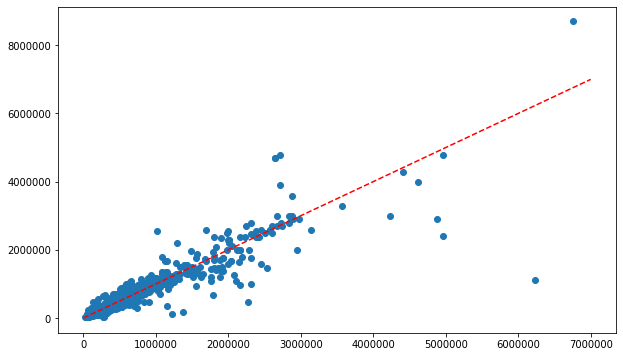

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(prediction, y_test)
plt.plot(range(0,7*10**6),range(0,7*10**6),color='red',linestyle='dashed')